# Gráficas con Seaborn

In [6]:
import pandas as pd
import seaborn as sns

La librería `seaborn` se trata de otra librería muy común para representación de gráficos.

Permite realizar operaciones similares a `pandas` o `matplotlib`.

Se puede encontrar la documentación completa en: https://seaborn.pydata.org/index.html

In [7]:
#Se emplea el código de esta celda solo si se está ejecutando el código en Google Collaboratory (se emplea para obtener los datos)
#En caso de estar ejecutando el código en un equipo local, no es necesario volver a descargar los datos

#  ! git clone https://github.com/bbaruque/VisDat_Ejemplos.git
#  data_dir = "./VisDat_Ejemplos/JupyterNotebooks/data/"  

In [8]:
# En caso de haber ejecutado la celda anterior, esta debe dejarse SIN EJECUTAR
data_dir = "../../data/datos_1ªy2ªParte/"

In [9]:
reviews = pd.read_csv(data_dir+"winemag-data_first150k.csv", index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Countplot

Equivalente al gráfico de barras ya visto en pandas

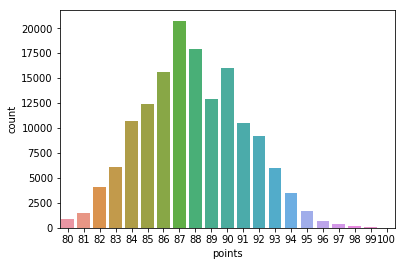

In [10]:
sns.countplot(reviews['points'])

La mayor diferencia con `pandas` es que en este caso, no se necesita realizar las cuentas de forma explícita (con `value_counts`), sino que la propia función se encarga de agregar los datos de la columna seleccionada. 

Seaborn no tiene equivalentes a los gráficos de línea o de área. Para ello emplea kdeplot.

## KDEplot

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


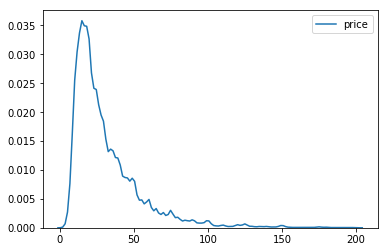

In [11]:
sns.kdeplot(reviews.query('price < 200').price)

KDE son las siglas de "Kernel Density Estimator". Es una técnica estadística que permite eliminar los "picos" que aparecen en las gráficas cuando se trata de valores medidos incorrectemante o que pueden variar sin que resulte aprecible para el problema (pero sí para la visualización).

Por ejemplo, varios vinos cuyo precio sea 20€ y uno solo sea de 19.93€ deberían considerarse aproximadamente iguales.

Veamos la diferencia con un plot de linea como los ya conocidos:

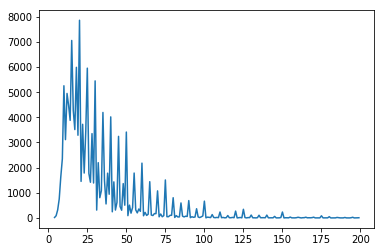

In [12]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

Como vemos, la gráfica de KDE es mejor que la de línea simple para visualizar la "verdadera" forma de los datos en intervalo. Se recomienda siempre en estas situaciones.


Sin embargo, resulta una elección peor cuando se trata de datos categóricos ordinales: El KDe espera que, si hay 200 vinos con puntuaciones de 85 y 400 con 86, los valores intermedios, p. ej. 85,5 deberían tener "suavizarse" a un valor intermedio, p.ej. 300. Sin emabrgo, si ese valor no existe (no hay notas con decimales), se está intentando ajustar a valores que no se contemplan en el problema.

En estos casos, un diagrama de línea es lo más adecuado.

Se pueden emplear gráficos KDE en 2 dimensiones:

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


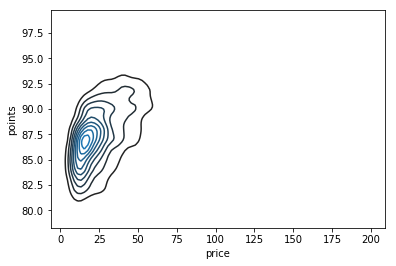

In [13]:
# De la tabla 'reviews' se obtienen aquellas entradas con precion menor a 200
# Se extraen las columnas 'price', 'points' (para todas las entradas que quedaban)
# Se eliminan aquellas entradas que contengan valores `nan` (datos faltantes) con dropna
# Se seleccionan aleatoriamente 5000
price_less_200 = reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000)

#Se solicita realizar el plot KDE en 2 dimensiones
sns.kdeplot(price_less_200['price'], price_less_200['points'])

Es el gráfico equivalente al hexplot que se vió en el tema 2.  
Como vemos, es otra forma de resolver el problema de 'overplotting' que vimos anteriormente (con el scatterplot o gráfico de dispersión) con otra visualización.
Es conveninete destacar que es muy computacionalmente intensivo y por eso, se ha reducido la muestra de datos a 5000.

## Distplot

Se trata del equivalente al histograma que se ha visto en `pandas`.

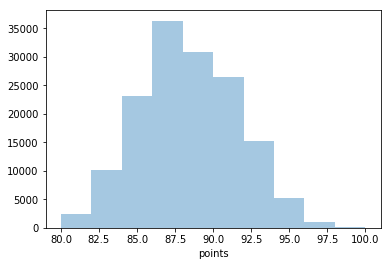

In [14]:
sns.distplot(reviews['points'], bins=10, kde=False)

Es un tipo de gráfica compuesta. Se puede indicar que represente también el KDE de cada intervalo.
En el ejemplo anterior se especifica, para mejor visualización, que solo se creen 10 intervalos: son suficientes para incluir 2 valores de la columna point por cada barra.

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


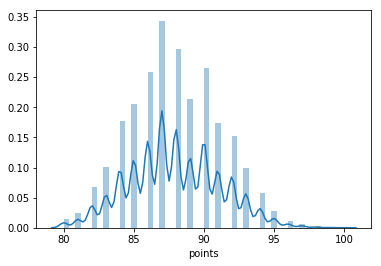

In [15]:
sns.distplot(reviews['points'])

## Scatterplot and hexplot

Para representar dos variables, una en función de la otra, en seaborn se emplea la función `jointplot`.

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


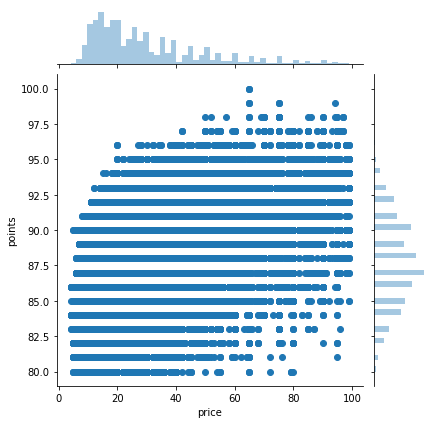

In [16]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

Se añade el cálculo del coeficiente de pearson y un histograma que permite ver cuantas muestras caen en cada fila o columna. Muchos gráficos de Seaborn incluyen este tipo de información extra.

Por lo demás, es igual al scatterplot de pandas.

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


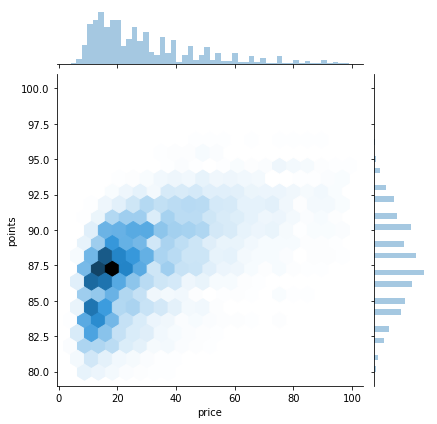

In [17]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=20)

## Gráficas de Caja y de Violín (Boxplot y violin plot)

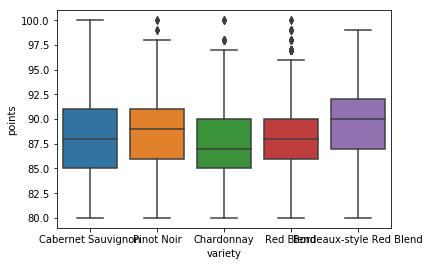

In [18]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

Por cada variable aparece una caja, en el centro de las distribuciones.

La parte superior de la misma representa el percentil 75 de la muestra, mientras que la parte inferior representa el percentil 25. Es decir, los rangos en los que se puede incluir la mitad de los datos aparecen representados en la caja. La linea dibujada en el medio es la mediana.

Las lineas o "bigotes" indican hasta donde se extienden las muestras de datos más allá del centro de la distribución. Los puntos individuales más allá de estos representan outliers (puntos individuales muy distanciados del resto).

Se puede comprobar que aunque las 5 variedades reciben aproximadamente las mismas puntuaciones, los vinos de "Bordeaux" (decha.) tienden a ser valorados un poco mejor que los "Chardonnay" (centro).

--- 

La ventaja de este tipo de gráficos es que se pueden emplear en muchos tipos de datos. Tampoco tienen limite de uso: se pueden incluir tantas cajas como haya espacio.

Como restricción: solo funcionan con variables de intervalo y variables nominales con un numero grande de posibles valores. Además, asumen que los datos se distribuyen en una distribución normal y no aportan mucha información sobre los valores individuales.

C:\ProgramData\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


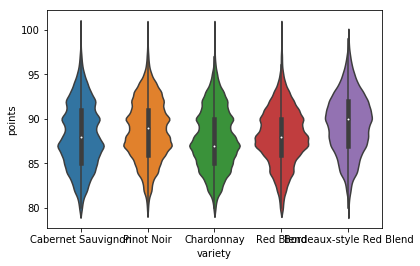

In [19]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

En este caso, se reemplaza la caja del boxplot por una función KDE para los datos. 
La informaciónm representada es muy parecida, pero puede ser más intuitivo de interpretar (a mayor anchura, mayor número de datos que incluyen ese valor).

## ¿Por qué emplear Seaborn?

La principal ventaja de la librería `seaborn` es que sus metodos están diseñados para procesar los datos que aparecen organizados de forma "orientada a los registros" es decir, en la forma tabular que hemos estado empleando en los ejemplos. En general, se necesitan pocas transformaciones sobre los datos antes de presentarlos.

Por su parte `pandas` depende en su funcionamiento más de que los datos se tranformen para adaptarse a lo que espera la función (por ejemplo, teniendo que contar valores con `value_count()`).